In [2]:
from fastai.tabular.all import *
from sklearn.metrics import roc_auc_score

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [3]:
path='/Volumes/TAPPS/Glo'
compe='tabular-playground-series-sep-2021'

In [4]:
df=pd.read_csv(f'{path}/{compe}/train.csv')
c=df.claim.value_counts()
print(c)

0    480404
1    477515
Name: claim, dtype: int64


In [5]:
df_test=pd.read_csv(f'{path}/{compe}/test.csv')
df_sub=pd.read_csv(f'{path}/{compe}/sample_solution.csv')
len(df),len(df_test)

(957919, 493474)

In [6]:
df_sub.head(2)

,id,claim
0,957919,0.50
1,957920,0.50


In [7]:
df.head(3)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.11,0.00,-37.57,0.02,0.29,-10.25,135.12,168900.00,399240000000000.00,...,-12.23,1.75,1.91,-7.12,4378.80,1.21,861340000000000.00,140.10,1.02,1
1,1,0.10,0.30,11822.00,0.28,0.46,-0.84,1721.90,119810.00,3874100000000000.00,...,-56.76,4.17,0.35,4.14,913.23,1.25,7575100000000000.00,1861.00,0.28,0
2,2,0.18,-0.01,907.27,0.27,0.46,0.17,2298.00,360650.00,12245000000000.00,...,-5.77,1.20,0.26,8.13,45119.00,1.18,321810000000000.00,3838.20,0.41,1


In [8]:
df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.00,942672.00,942729.00,942428.00,942359.00,942514.00,942398.00,942415.00,942546.00,942670.00,...,942554.00,942420.00,942509.00,942686.00,942481.00,942360.00,942330.00,942512.00,942707.00,957919.00
mean,478959.00,0.09,0.35,4068.74,0.20,0.30,-0.07,1620.84,377164.16,1806053749440367.25,...,-19.93,2.07,23.89,1.75,63152.97,1.21,42769052891231648.00,3959.20,0.56,0.50
std,276527.54,0.04,0.15,6415.83,0.21,0.15,2.12,1276.28,345432.47,2335204188640574.00,...,18.58,0.90,45.58,10.09,92435.02,0.11,67324411404428680.00,3155.99,0.41,0.50
min,0.00,-0.15,-0.02,-9421.70,-0.08,-0.01,-12.79,-224.80,-29843.00,-1153300000000000.00,...,-105.86,0.28,-27.69,-26.59,-81977.00,0.91,-8944400000000000.00,-415.24,-0.15,0.00
25%,239479.50,0.07,0.28,418.43,0.04,0.24,-1.12,481.55,91209.00,11531000000000.00,...,-28.81,1.49,-0.63,-4.47,2443.20,1.15,232110000000000.00,1306.20,0.28,0.00
50%,478959.00,0.09,0.39,1279.50,0.14,0.33,-0.38,1446.10,289670.00,504305000000000.00,...,-14.64,1.66,1.73,0.89,19479.00,1.18,13275000000000000.00,3228.00,0.47,0.00
75%,718438.50,0.12,0.46,4444.40,0.30,0.41,0.92,2495.90,560560.00,3103100000000000.00,...,-5.33,2.52,18.99,6.84,88488.00,1.24,52787000000000000.00,6137.90,0.75,1.00
max,957918.00,0.42,0.52,39544.00,1.32,0.55,11.20,5426.60,1913700.00,10424000000000000.00,...,1.61,4.57,217.84,47.76,526050.00,1.89,324990000000000000.00,13151.00,2.74,1.00


In [13]:
df.isna().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

In [15]:
def FE(m):
    selected_cols = m.columns[(m.max() > 1000)& (m.min()>0)].to_list()
    const=m[selected_cols].min()
    m[selected_cols]=np.log1p(m[selected_cols]+const)
    return m

In [106]:
xtrain[selected_cols]

,f3,f7,f10,f12,f20,f21,f25,f26,f27,f28,...,f92,f96,f98,f102,f103,f104,f108,f114,f116,f117
555071,2747.50,1389.20,361.89,2411500000.00,1.77,158820.00,680.70,1021300000000.00,4995800000000.00,83795.00,...,18570.00,429.34,-1678000000000.00,428240.00,29.36,934.14,1587800000.00,33203.00,15043000000000000.00,7064.80
73385,1604.70,83.50,48514.00,3287300000.00,45.09,6477.60,1049.40,1901300000000.00,1646900000000.00,363480.00,...,10764.00,NaN,-23202000000.00,662580.00,41.28,7690.60,277490000.00,378760.00,197000000000000000.00,4117.30
690500,4013.20,3060.30,4598.80,3976500000.00,6.25,288390.00,416.74,470490000000.00,18191000000.00,82759.00,...,9676.90,55.96,53697000000000.00,208290.00,342.30,4115.70,2220800000.00,417440.00,1156600000000000.00,2299.90
872954,27253.00,139.98,3575.40,5001500000.00,27.90,124910.00,58.18,-2386400000.00,2010800000000.00,-25882.00,...,-103.97,5637.20,47270000000000.00,398720.00,39.89,29770.00,968260000.00,66916.00,36806000000000000.00,4503.10
254986,132.63,161.12,1584.70,97536000.00,8.76,-607.02,422.63,3510200000000.00,19002000000.00,4679500.00,...,11203.00,10.18,24121000000.00,115050.00,-6.82,17051.00,1719200000.00,96961.00,38762000000000000.00,5015.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401846,5379.10,1282.30,-20.56,716580000.00,419.53,9804.40,60.93,4163200000000.00,2999200000000.00,3063900.00,...,7357.50,12474.00,27757000000000.00,16815.00,848.63,-19.47,4554700000.00,-1030.60,4818200000000000.00,909.92
919117,383.51,1673.40,-20.64,-26251000.00,NaN,292020.00,580.58,NaN,1204500000000.00,3822300.00,...,2785.90,164.60,NaN,352750.00,38.68,20788.00,4458800000.00,218490.00,258660000000000000.00,2748.90
890619,6732.80,4583.90,-150.15,438010000.00,-1.54,5555.80,631.75,25241000000.00,3191900000000.00,67209.00,...,225.10,504.33,41121000000000.00,580720.00,6.99,549.86,3468300000.00,30380.00,24295000000000000.00,4496.00
729464,711.85,75.70,44.74,9260800.00,827.91,25664.00,648.41,1150400000000.00,4523800000000.00,7955800.00,...,0.80,-106.64,-429340000000.00,8074.60,2475.40,706.87,114290000.00,50525.00,-283910000000000.00,4554.10


In [90]:
selected_cols

['f3',
 'f7',
 'f10',
 'f12',
 'f20',
 'f21',
 'f25',
 'f26',
 'f27',
 'f28',
 'f32',
 'f33',
 'f35',
 'f36',
 'f37',
 'f39',
 'f41',
 'f52',
 'f62',
 'f65',
 'f67',
 'f72',
 'f73',
 'f74',
 'f77',
 'f78',
 'f82',
 'f84',
 'f85',
 'f86',
 'f89',
 'f92',
 'f96',
 'f98',
 'f102',
 'f103',
 'f104',
 'f108',
 'f114',
 'f116',
 'f117']

### EDA

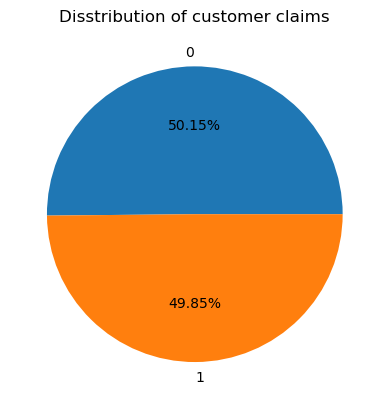

Shape is  (957919, 120)


In [16]:
import matplotlib.pyplot as plt
plt.pie(c, labels=c.index, autopct='%1.2f%%')
plt.title('Disstribution of customer claims')
plt.show()
print('Shape is ',df.shape)

In [59]:
X=df.drop(['id','claim'],axis=1)
y=df['claim']

In [60]:
from sklearn.model_selection import train_test_split 

xtrain,xvalid,ytrain,yvalid=train_test_split(X,y,test_size=0.25)

In [61]:
len(xvalid)/len(xtrain)

0.3333337973022066

In [62]:
num_cols=X.columns.to_list()
cat_cols=[x for x in X.columns.to_list() if x not in num_cols ]
cat_cols

[]

In [63]:
# xtrain=FE(xtrain.copy())
# xvalid=FE(xvalid.copy())

### Model Building

In [64]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE        



numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols),
        ("numerical", numeric_preprocessor,num_cols),
    ]
)

In [65]:
pipe = make_pipeline(preprocessor, XGBClassifier())
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [66]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [63]:
preds=pipe.predict_proba(xvalid)[:,1].round(2)

In [67]:
preds

array([0.42, 0.23, 0.43, ..., 0.89, 0.26, 0.87], dtype=float32)

### CV Model Building

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
features=df.drop(['id'],axis=1).columns.to_list()
# features

In [29]:
train_oof = np.zeros((957919,))
folds=5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(skf.split(df[features], df['claim'])):
    X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
    y_train = X_train['claim']
    y_valid = X_valid['claim']
    X_train = X_train.drop('claim', axis=1)
    X_valid = X_valid.drop('claim', axis=1)

    model = XGBClassifier(random_state=42, verbosity=0)

    model =  model.fit(X_train, y_train, verbose=0)
    temp_oof = model.predict_proba(X_valid)[:, 1]
    train_oof[valid_idx] = temp_oof
    print(f'Fold {fold} AUC: ', roc_auc_score(y_valid, temp_oof))
    break
    
print(f'OOF AUC: ', roc_auc_score(df['claim'], train_oof))

Fold 0 AUC:  0.799105363975735


NameError: name 'train_df' is not defined

In [36]:
model.predict_proba(X_valid)[:]

array([[0.027991  , 0.972009  ],
       [0.62173545, 0.37826455],
       [0.53350025, 0.46649975],
       ...,
       [0.7731257 , 0.22687429],
       [0.6956078 , 0.30439225],
       [0.8063806 , 0.19361939]], dtype=float32)

In [54]:
preds=model.predict_proba(df_test)[:,1].round(2)
preds

array([0.42, 0.23, 0.43, ..., 0.89, 0.26, 0.87], dtype=float32)

In [39]:
model.predict(df_test)

array([1, 0, 0, ..., 0, 0, 0])

In [33]:
np.zeros((957919,))

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
X_valid.shape,df.shape

((191584, 119), (957919, 120))

In [44]:
xtest.shape

(493474, 118)

In [49]:
X_valid.columns

Index(['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117',
       'f118'],
      dtype='object', length=119)

### Testing the preds

In [47]:
from sklearn.metrics import log_loss

In [68]:
loss_xgb=log_loss(yvalid,preds)

In [69]:
loss_xgb

9.682280242396446

In [40]:
xtest=df_test.drop('id',axis=1)

In [82]:
xtest1=FE(xtest.copy())
xtest1.head(2)

/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/Volumes/TAPPS/DS_APPS/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.17,0.49,7.17,0.02,0.32,0.90,6.35,8.23,28.63,8.74,...,0.16,-22.19,2.07,0.43,-10.74,11.31,1.19,32.92,7.61,0.46
1,0.13,0.37,7.48,0.73,0.33,-1.26,6.78,13.23,34.02,6.84,...,0.82,-1.63,1.57,-1.07,11.83,11.41,1.15,38.32,8.80,0.28


In [75]:
xtest.head(2)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.17,0.49,1295.00,0.02,0.32,0.90,573.29,8.23,28.63,6221.00,...,0.16,-22.19,2.07,0.43,-10.74,81606.00,1.19,198040000000000.00,2017.10,0.46
1,0.13,0.37,1763.00,0.73,0.33,-1.26,875.55,13.23,34.02,934.43,...,0.82,-1.63,1.57,-1.07,11.83,90114.00,1.15,43880000000000000.00,6638.90,0.28


In [70]:
from catboost import CatBoostClassifier

In [71]:
pipe_cat=make_pipeline(preprocessor, CatBoostClassifier())

In [72]:
pipe_cat.fit(xtrain,ytrain)

Learning rate set to 0.170849
0:	learn: 0.6926920	total: 154ms	remaining: 2m 33s
1:	learn: 0.6918852	total: 294ms	remaining: 2m 26s
2:	learn: 0.6910137	total: 522ms	remaining: 2m 53s
3:	learn: 0.6897627	total: 666ms	remaining: 2m 45s
4:	learn: 0.6885316	total: 788ms	remaining: 2m 36s
5:	learn: 0.6877292	total: 918ms	remaining: 2m 32s
6:	learn: 0.6869726	total: 1.06s	remaining: 2m 30s
7:	learn: 0.6856955	total: 1.22s	remaining: 2m 31s
8:	learn: 0.6849144	total: 1.36s	remaining: 2m 29s
9:	learn: 0.6846860	total: 1.46s	remaining: 2m 24s
10:	learn: 0.6839466	total: 1.6s	remaining: 2m 23s
11:	learn: 0.6828340	total: 1.74s	remaining: 2m 23s
12:	learn: 0.6814768	total: 1.88s	remaining: 2m 22s
13:	learn: 0.6803436	total: 2.02s	remaining: 2m 22s
14:	learn: 0.6796293	total: 2.15s	remaining: 2m 21s
15:	learn: 0.6791186	total: 2.31s	remaining: 2m 21s
16:	learn: 0.6782191	total: 2.45s	remaining: 2m 21s
17:	learn: 0.6773369	total: 2.62s	remaining: 2m 23s
18:	learn: 0.6762957	total: 2.8s	remaining: 2

158:	learn: 0.6060255	total: 22.9s	remaining: 2m 1s
159:	learn: 0.6054323	total: 23.1s	remaining: 2m 1s
160:	learn: 0.6047696	total: 23.2s	remaining: 2m
161:	learn: 0.6044321	total: 23.3s	remaining: 2m
162:	learn: 0.6038803	total: 23.5s	remaining: 2m
163:	learn: 0.6034312	total: 23.6s	remaining: 2m
164:	learn: 0.6030930	total: 23.8s	remaining: 2m
165:	learn: 0.6026617	total: 23.9s	remaining: 2m
166:	learn: 0.6026040	total: 24s	remaining: 1m 59s
167:	learn: 0.6024383	total: 24.2s	remaining: 1m 59s
168:	learn: 0.6022625	total: 24.3s	remaining: 1m 59s
169:	learn: 0.6019166	total: 24.4s	remaining: 1m 59s
170:	learn: 0.6017877	total: 24.6s	remaining: 1m 59s
171:	learn: 0.6017254	total: 24.7s	remaining: 1m 58s
172:	learn: 0.6015649	total: 24.8s	remaining: 1m 58s
173:	learn: 0.6010102	total: 24.9s	remaining: 1m 58s
174:	learn: 0.6007768	total: 25s	remaining: 1m 58s
175:	learn: 0.6004794	total: 25.2s	remaining: 1m 57s
176:	learn: 0.6002357	total: 25.3s	remaining: 1m 57s
177:	learn: 0.6000745	t

315:	learn: 0.5801132	total: 44.7s	remaining: 1m 36s
316:	learn: 0.5800485	total: 44.8s	remaining: 1m 36s
317:	learn: 0.5800124	total: 44.9s	remaining: 1m 36s
318:	learn: 0.5799745	total: 45s	remaining: 1m 36s
319:	learn: 0.5798984	total: 45.2s	remaining: 1m 35s
320:	learn: 0.5797591	total: 45.3s	remaining: 1m 35s
321:	learn: 0.5796679	total: 45.4s	remaining: 1m 35s
322:	learn: 0.5796305	total: 45.7s	remaining: 1m 35s
323:	learn: 0.5795881	total: 45.8s	remaining: 1m 35s
324:	learn: 0.5794922	total: 46s	remaining: 1m 35s
325:	learn: 0.5793835	total: 46.1s	remaining: 1m 35s
326:	learn: 0.5792943	total: 46.2s	remaining: 1m 35s
327:	learn: 0.5792605	total: 46.3s	remaining: 1m 34s
328:	learn: 0.5790747	total: 46.5s	remaining: 1m 34s
329:	learn: 0.5789543	total: 46.7s	remaining: 1m 34s
330:	learn: 0.5788310	total: 46.8s	remaining: 1m 34s
331:	learn: 0.5787925	total: 46.9s	remaining: 1m 34s
332:	learn: 0.5787067	total: 47s	remaining: 1m 34s
333:	learn: 0.5786740	total: 47.1s	remaining: 1m 33s

472:	learn: 0.5704286	total: 1m 7s	remaining: 1m 15s
473:	learn: 0.5703957	total: 1m 8s	remaining: 1m 15s
474:	learn: 0.5703246	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.5702914	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.5702520	total: 1m 8s	remaining: 1m 15s
477:	learn: 0.5701870	total: 1m 8s	remaining: 1m 14s
478:	learn: 0.5701534	total: 1m 8s	remaining: 1m 14s
479:	learn: 0.5701215	total: 1m 8s	remaining: 1m 14s
480:	learn: 0.5700407	total: 1m 8s	remaining: 1m 14s
481:	learn: 0.5700023	total: 1m 9s	remaining: 1m 14s
482:	learn: 0.5699736	total: 1m 9s	remaining: 1m 14s
483:	learn: 0.5699435	total: 1m 9s	remaining: 1m 13s
484:	learn: 0.5698846	total: 1m 9s	remaining: 1m 13s
485:	learn: 0.5698279	total: 1m 9s	remaining: 1m 13s
486:	learn: 0.5697949	total: 1m 9s	remaining: 1m 13s
487:	learn: 0.5697167	total: 1m 9s	remaining: 1m 13s
488:	learn: 0.5696864	total: 1m 10s	remaining: 1m 13s
489:	learn: 0.5696527	total: 1m 10s	remaining: 1m 13s
490:	learn: 0.5696201	total: 1m 10s	remainin

627:	learn: 0.5638221	total: 1m 33s	remaining: 55.3s
628:	learn: 0.5637908	total: 1m 33s	remaining: 55.2s
629:	learn: 0.5637564	total: 1m 33s	remaining: 55.1s
630:	learn: 0.5637221	total: 1m 33s	remaining: 55s
631:	learn: 0.5636936	total: 1m 34s	remaining: 54.8s
632:	learn: 0.5636621	total: 1m 34s	remaining: 54.7s
633:	learn: 0.5636056	total: 1m 34s	remaining: 54.6s
634:	learn: 0.5635715	total: 1m 34s	remaining: 54.5s
635:	learn: 0.5635404	total: 1m 34s	remaining: 54.4s
636:	learn: 0.5635116	total: 1m 35s	remaining: 54.2s
637:	learn: 0.5634767	total: 1m 35s	remaining: 54.1s
638:	learn: 0.5634464	total: 1m 35s	remaining: 54s
639:	learn: 0.5633840	total: 1m 35s	remaining: 53.8s
640:	learn: 0.5633484	total: 1m 35s	remaining: 53.7s
641:	learn: 0.5633152	total: 1m 36s	remaining: 53.5s
642:	learn: 0.5632800	total: 1m 36s	remaining: 53.4s
643:	learn: 0.5632486	total: 1m 36s	remaining: 53.2s
644:	learn: 0.5632125	total: 1m 36s	remaining: 53.1s
645:	learn: 0.5631606	total: 1m 36s	remaining: 52.

784:	learn: 0.5582503	total: 1m 59s	remaining: 32.6s
785:	learn: 0.5582168	total: 1m 59s	remaining: 32.5s
786:	learn: 0.5581853	total: 1m 59s	remaining: 32.3s
787:	learn: 0.5581429	total: 1m 59s	remaining: 32.2s
788:	learn: 0.5581131	total: 1m 59s	remaining: 32s
789:	learn: 0.5580772	total: 1m 59s	remaining: 31.9s
790:	learn: 0.5580433	total: 2m	remaining: 31.7s
791:	learn: 0.5580113	total: 2m	remaining: 31.6s
792:	learn: 0.5579798	total: 2m	remaining: 31.4s
793:	learn: 0.5579508	total: 2m	remaining: 31.3s
794:	learn: 0.5579193	total: 2m	remaining: 31.2s
795:	learn: 0.5578859	total: 2m 1s	remaining: 31s
796:	learn: 0.5578523	total: 2m 1s	remaining: 30.9s
797:	learn: 0.5578243	total: 2m 1s	remaining: 30.7s
798:	learn: 0.5577722	total: 2m 1s	remaining: 30.6s
799:	learn: 0.5577367	total: 2m 1s	remaining: 30.5s
800:	learn: 0.5577111	total: 2m 2s	remaining: 30.3s
801:	learn: 0.5576757	total: 2m 2s	remaining: 30.2s
802:	learn: 0.5576328	total: 2m 2s	remaining: 30s
803:	learn: 0.5576016	total

942:	learn: 0.5528821	total: 2m 25s	remaining: 8.82s
943:	learn: 0.5528491	total: 2m 25s	remaining: 8.66s
944:	learn: 0.5528205	total: 2m 26s	remaining: 8.5s
945:	learn: 0.5527944	total: 2m 26s	remaining: 8.35s
946:	learn: 0.5527615	total: 2m 26s	remaining: 8.2s
947:	learn: 0.5527332	total: 2m 26s	remaining: 8.04s
948:	learn: 0.5526998	total: 2m 26s	remaining: 7.89s
949:	learn: 0.5526677	total: 2m 26s	remaining: 7.73s
950:	learn: 0.5526403	total: 2m 27s	remaining: 7.58s
951:	learn: 0.5526134	total: 2m 27s	remaining: 7.42s
952:	learn: 0.5525796	total: 2m 27s	remaining: 7.27s
953:	learn: 0.5525484	total: 2m 27s	remaining: 7.11s
954:	learn: 0.5525119	total: 2m 27s	remaining: 6.96s
955:	learn: 0.5524785	total: 2m 27s	remaining: 6.8s
956:	learn: 0.5524476	total: 2m 27s	remaining: 6.65s
957:	learn: 0.5524144	total: 2m 28s	remaining: 6.49s
958:	learn: 0.5523893	total: 2m 28s	remaining: 6.34s
959:	learn: 0.5523572	total: 2m 28s	remaining: 6.18s
960:	learn: 0.5523247	total: 2m 28s	remaining: 6.

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['f1', 'f2', 'f3', 'f4', 'f5',
                                                   'f6', 'f7', 'f8', 'f9',
                                                   'f10', 'f11', 'f12', 'f13',
                                                   'f14', 'f15', 'f16', 'f17',
                                                   'f18', 'f19', 'f20', 'f21',
                                                   'f22', 'f23', 'f24', 'f25',
                                                   'f26', 'f27', 'f28', 'f29',
                                                   'f30', ...])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x14c6be6d0>)])

In [73]:
preds=pipe_cat.predict_proba(xvalid)[:,1].round(2)

In [74]:
preds

array([0.65, 0.55, 0.83, ..., 0.71, 0.8 , 0.47])

In [75]:
roc_auc_score(yvalid,preds)

0.795133914603265

In [76]:
preds=pipe_cat.predict_proba(xtest)[:,1].round(2)
preds

array([0.41, 0.27, 0.47, ..., 0.88, 0.27, 0.87])

In [77]:
len(preds)

493474

### Submission

In [57]:
# Dumb model: 0.5
# XGB model: 0.71
# XGB with crct predicted probs: 0.799

In [55]:
import subprocess
import os

def make_sub(pred_y, sub_data=df_test, name='default'):
    df_submission = pd.DataFrame()
    df_submission['id'] = df_test['id']
    df_submission['claim'] = pred_y
    
    folder_path = 'Submissions/'
    os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist
    
    file_path = os.path.join(folder_path, f'sub-{name}.csv')
    df_submission.to_csv(file_path, index=False)
    
    cmd = f'kaggle competitions submit -c {compe} -f {file_path} -m "Message"'
    subprocess.run(cmd, shell=True)
    
    print(f'Successfully saved - {name} at {file_path}')


In [13]:
preds=[0.5]*len(df_test)
make_sub(preds,name='dumb')

100%|██████████| 5.61M/5.61M [00:03<00:00, 1.64MB/s]


Successfully submitted to Tabular Playground Series - Sep 2021Successfully saved - dumb at Submissions/sub-dumb.csv


In [56]:
make_sub(preds,name='xgb_clf')

100%|██████████| 4.67M/4.67M [00:02<00:00, 2.36MB/s]


Successfully submitted to Tabular Playground Series - Sep 2021Successfully saved - xgb_clf at Submissions/sub-xgb_clf.csv


In [57]:
make_sub(preds,name='cv_XGB_no_mean_rep')

100%|██████████| 6.03M/6.03M [00:02<00:00, 2.32MB/s]


Successfully submitted to Tabular Playground Series - Sep 2021Successfully saved - cv_XGB_no_mean_rep at Submissions/sub-cv_XGB_no_mean_rep.csv


In [68]:
make_sub(preds,name='XGB_mean_rep')

100%|██████████| 6.03M/6.03M [00:02<00:00, 2.33MB/s]


Successfully submitted to Tabular Playground Series - Sep 2021Successfully saved - XGB_mean_rep at Submissions/sub-XGB_mean_rep.csv


In [78]:
make_sub(preds,name='Cat_mean_rep')

100%|██████████| 6.03M/6.03M [00:03<00:00, 1.82MB/s]


Successfully submitted to Tabular Playground Series - Sep 2021Successfully saved - Cat_mean_rep at Submissions/sub-Cat_mean_rep.csv
